<a href="https://colab.research.google.com/github/farid-hamid/FinalYearProjectFH/blob/main/BERTopic_Model_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [25]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import string

In [3]:
import nltk

In [4]:
%pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=fcc04904b4a564af0e17091df0f261b18a6c070848a82786728e2e011e950520
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [5]:
%pip install HDBSCAN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 19.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for HDBSCAN: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039291 sha256=c8c12753dde88a76634677a99c300bf109a4c620807f83d8143d6c266a426568
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built HDBSCAN
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


In [7]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Unlabelled Discussion DATA.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subReddit            1200 non-null   object        
 1   Date                 1200 non-null   object        
 2   Datetime             1200 non-null   datetime64[ns]
 3   Title                1194 non-null   object        
 4   Body Text            929 non-null    object        
 5   Top Comment          91 non-null     object        
 6   Top Comment Reply 1  25 non-null     object        
 7   Top Comment Reply 2  10 non-null     object        
 8   Top Comment Reply 3  0 non-null      float64       
 9   Top Comment Reply 4  0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 93.9+ KB


In [9]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subReddit            1200 non-null   object        
 1   Date                 1200 non-null   object        
 2   Datetime             1200 non-null   datetime64[ns]
 3   Title                1194 non-null   object        
 4   Body Text            929 non-null    object        
 5   Top Comment          91 non-null     object        
 6   Top Comment Reply 1  25 non-null     object        
 7   Top Comment Reply 2  10 non-null     object        
 8   Top Comment Reply 3  0 non-null      float64       
 9   Top Comment Reply 4  0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 93.9+ KB


In [10]:
data = df

In [11]:
data.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,Cheapest way to get a CGM without insurance?,Well after being told my insurance would cover...,NaN,NaN,NaN,NaN,NaN
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,Libre 3 doesn’t stick,I’ve used the Libre 3 for 3 months off and on....,NaN,NaN,NaN,NaN,NaN
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,Frustrated with Libre 3,I just got off the phone with customer support...,NaN,NaN,NaN,NaN,NaN
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,Libre 3 Graphs 3 weeks in,The first graph was my first full day with my ...,NaN,NaN,NaN,NaN,NaN
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,Confused by GMI on Libre 3,I'm finding myself confused by the GMI measure...,NaN,NaN,NaN,NaN,NaN


In [12]:
n = len(data)

In [13]:
data.drop(['Date', 'Datetime'], axis=1)


,subReddit,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4
0,diabetes_t2,Cheapest way to get a CGM without insurance?,Well after being told my insurance would cover...,NaN,NaN,NaN,NaN,NaN
1,diabetes_t2,Libre 3 doesn’t stick,I’ve used the Libre 3 for 3 months off and on....,NaN,NaN,NaN,NaN,NaN
2,diabetes_t2,Frustrated with Libre 3,I just got off the phone with customer support...,NaN,NaN,NaN,NaN,NaN
3,diabetes_t2,Libre 3 Graphs 3 weeks in,The first graph was my first full day with my ...,NaN,NaN,NaN,NaN,NaN
4,diabetes_t2,Confused by GMI on Libre 3,I'm finding myself confused by the GMI measure...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1195,diabetes_t2,Morning Spikes,Anyone else get 60/70 point increases in the m...,NaN,NaN,NaN,NaN,NaN
1196,diabetes_t2,This is what severe anxiety does to my blood s...,I did not eat any carbs with either of those ...,NaN,NaN,NaN,NaN,NaN
1197,diabetes,I tried having it on my arm just once as sugge...,The filament bent like 15 minutes after I've p...,NaN,NaN,NaN,NaN,NaN
1198,diabetes,"Mine keeps breaking, on my right arm.",I have had 3 break and stop reading.,NaN,NaN,NaN,NaN,NaN


In [14]:
#stage 1 lowercase
data['Title'] = data['Title'].str.lower()
data['Body Text'] = data['Body Text'].str.lower()
data['Top Comment'] = data['Top Comment'].str.lower()
data['Top Comment Reply 1'] = data['Top Comment Reply 1'].str.lower()
data['Top Comment Reply 2'] = data['Top Comment Reply 2'].str.lower()
#data['Top Comment Reply 3'] = data['Top Comment Reply 3'].str.lower()
#data['Top Comment Reply 4'] = data['Top Comment Reply 4'].str.lower()

In [15]:
data.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,cheapest way to get a cgm without insurance?,well after being told my insurance would cover...,NaN,NaN,NaN,NaN,NaN
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,libre 3 doesn’t stick,i’ve used the libre 3 for 3 months off and on....,NaN,NaN,NaN,NaN,NaN
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,frustrated with libre 3,i just got off the phone with customer support...,NaN,NaN,NaN,NaN,NaN
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,libre 3 graphs 3 weeks in,the first graph was my first full day with my ...,NaN,NaN,NaN,NaN,NaN
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,confused by gmi on libre 3,i'm finding myself confused by the gmi measure...,NaN,NaN,NaN,NaN,NaN


In [16]:
data.fillna('', inplace=True)
data['Discussion'] = data.apply(lambda row: ' '.join(row[['Title', 'Body Text', 'Top Comment']].values), axis=1)

In [17]:
data.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,cheapest way to get a cgm without insurance?,well after being told my insurance would cover...,,,,,,cheapest way to get a cgm without insurance? w...
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,libre 3 doesn’t stick,i’ve used the libre 3 for 3 months off and on....,,,,,,libre 3 doesn’t stick i’ve used the libre 3 fo...
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,frustrated with libre 3,i just got off the phone with customer support...,,,,,,frustrated with libre 3 i just got off the pho...
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,libre 3 graphs 3 weeks in,the first graph was my first full day with my ...,,,,,,libre 3 graphs 3 weeks in the first graph was ...
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,confused by gmi on libre 3,i'm finding myself confused by the gmi measure...,,,,,,confused by gmi on libre 3 i'm finding myself ...


In [18]:
def remove_punctuation_and_emojis(text):
    if not isinstance(text, str):
        #if text is not a string, return it as it is
        return text

    punctuation = string.punctuation
    #punctuation translator
    translator = str.maketrans('', '', string.punctuation)
    #remove punctuation
    text = text.translate(translator)

    #regex pattern for emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #removals

    return text

In [19]:
data['Discussion'] = data['Discussion'].apply(lambda x: remove_punctuation_and_emojis(x))

In [20]:
#stage 5: removal of numbers and other incoherent chars
def remove_chars(text):

    if isinstance(text, str):
        #replace numbers with empty string, remove nd,rd,st, http and www, any strings longer than 26 chars
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\bnd\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\brd\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\bst\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\bblah\b|\b[a-zA-Z]{1,2,3,4}\b', '', text)
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'\b\w{26,}\b', '', text)
    return text


In [21]:
data['Discussion'] = data['Discussion'].apply(lambda x: remove_chars(x) if isinstance(x, str) else x)

In [22]:
data = data[data['Discussion'].apply(lambda x: len(x) >= 10)] #remove records which are too short and will pollute the model

In [23]:
def clean_text_digits(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)


    translator = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(translator) for w in tokens]

    # Remove remaining tokens that are not alphabetic (including numbers and symbols)
    words = [word for word in stripped if word.isalpha()and len(word) > 2]

    # Join the list of words into a single string
    return ' '.join(words)

In [26]:
data['Discussion'] = data['Discussion'].apply(clean_text_digits)
df.head()

<ipython-input-26-f76292ae7eca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Discussion'] = data['Discussion'].apply(clean_text_digits)


,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,cheapest way to get a cgm without insurance?,well after being told my insurance would cover...,,,,,,cheapest way get cgm without insurance well ...
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,libre 3 doesn’t stick,i’ve used the libre 3 for 3 months off and on....,,,,,,libre doesn’ stick ’ used the libre for mon...
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,frustrated with libre 3,i just got off the phone with customer support...,,,,,,frustrated with libre just got off the phone...
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,libre 3 graphs 3 weeks in,the first graph was my first full day with my ...,,,,,,libre graphs weeks the first graph was fir...
4,diabetes_t2,2023-12-07 00:00:00,2023-12-07 16:34:00,confused by gmi on libre 3,i'm finding myself confused by the gmi measure...,,,,,,confused gmi libre finding myself confused...


In [27]:
%pip install spacy

In [28]:
import spacy

#spaCy English model loading
nlp = spacy.load("en_core_web_sm")

In [29]:
def document_length_splitter(texts, character_threshold=20):

  #parse text using spaCy
  if len(texts) > character_threshold:
        # Parse the text using spaCy to extract sentences
        doc = nlp(texts)
        #Return a list of sentences
        return [sentence.text for sentence in doc.sents]
  else:
        # If the text is not too long, return it as a single-element list
        return [texts]


In [30]:
df2 = data.copy()

In [31]:
df2['Discussion'] = df2['Discussion'].apply(document_length_splitter)

In [32]:
df3 = df2.explode('Discussion')

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subReddit            1347 non-null   object        
 1   Date                 1347 non-null   object        
 2   Datetime             1347 non-null   datetime64[ns]
 3   Title                1347 non-null   object        
 4   Body Text            1347 non-null   object        
 5   Top Comment          1347 non-null   object        
 6   Top Comment Reply 1  1347 non-null   object        
 7   Top Comment Reply 2  1347 non-null   object        
 8   Top Comment Reply 3  1347 non-null   object        
 9   Top Comment Reply 4  1347 non-null   object        
 10  Discussion           1347 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 126.3+ KB


In [34]:
EDA_DF = df3

In [35]:
keywords = ['prescription', 'pay', 'walmart', 'walgreens', 'fda', 'restrictions', 'tandem', 'insurance', 'cgm insurance']
pattern = '|'.join(keywords)  #patterns
EDA_DF['Contains_Keywords'] = EDA_DF['Discussion'].str.contains(pattern, case=False)

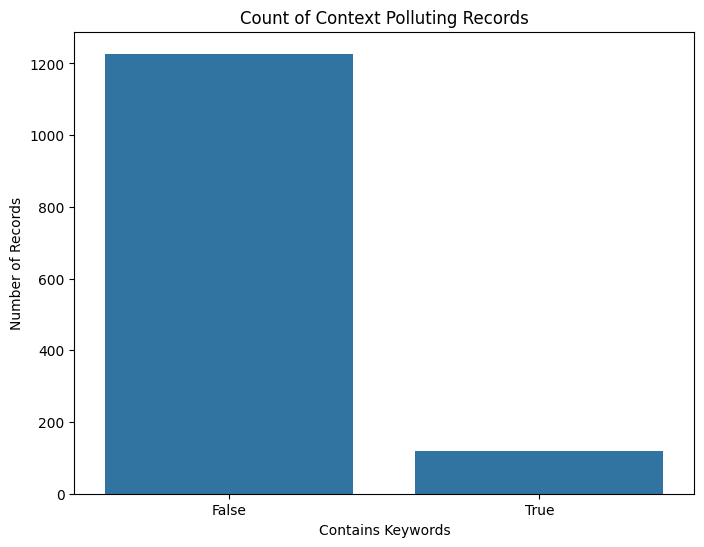

In [36]:
#data['Contains_Keywords'] = data['Discussion'].str.contains(pattern, case=False)
#data['Contains_Keywords'] = data['Discussion'].apply(lambda x: "prescription" in x or "pay" in x or "walmart" in x or "walgreens" in x or "fda" in x or "restrictions" in x or "pcp" in x or "tandem" in x )

#count of records containing either "prescription" or "pay"
plt.figure(figsize=(8, 6))
sns.countplot(x='Contains_Keywords', data=EDA_DF)
plt.title('Count of Context Polluting Records')
plt.xlabel('Contains Keywords')
plt.ylabel('Number of Records')
plt.show()

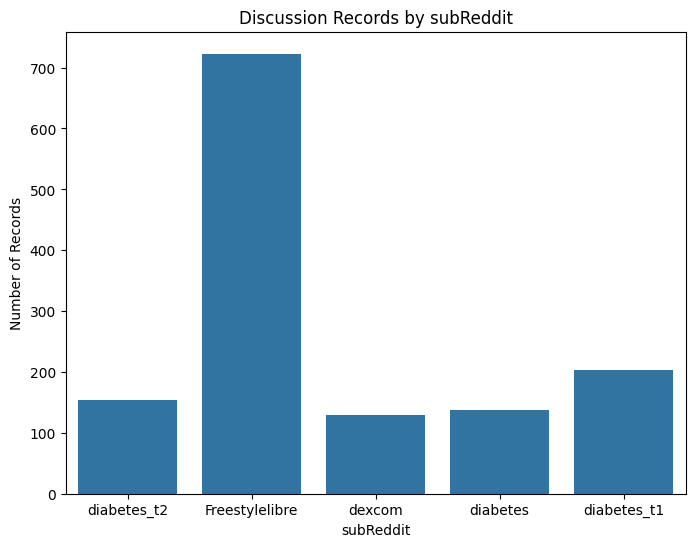

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='subReddit', data=EDA_DF)
plt.title('Discussion Records by subReddit')
#plt.xlabel('Contains Keywords')
plt.ylabel('Number of Records')
plt.show()

# **UMAP for Dimensionality Reduction & HDBSCAN for Clustering of topics**
Sub-models

In [38]:
from umap import UMAP
from hdbscan import HDBSCAN

umap_model = UMAP(n_neighbors=3, n_components=3, min_dist=0.02, random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=30, min_samples=10,
                        prediction_data=True, gen_min_span_tree=True)

In [39]:
%pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 9.1 MB/s eta 0:00:00


In [40]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [41]:
from tqdm.auto import tqdm

In [42]:
n = len(df3)

In [43]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer


# **Stopwords Removal**

In [44]:
from nltk.corpus import stopwords
stopwords = list(stopwords.words('english')) + ['prescription','doesn','sensor','sensors','yes','lol','lmao','wtf','abbott','abott','pay','month','medicare', 'cgms', 'fda', 'patients', 'voucher', 'doctor', 'dex', 'authorization', 'cost', 'service','medical','covered','freestyle','company','tempo','glucose','cover','mgdl','reading','lot','wanting','want','hours','months','readings','question','since','day','night','first','last','started','ago','dont','using','use','pump','loss','around','new','phone','put','days','app', 'mmol','mmoll', 'drug','heck','the','http', 'https', 'amp', 'com', 'one', 'www', 'anyone', 'can', 'CVS', 'insurance', 'get', 'like', 'back', 'ive', 'would', 'omnipod', 'pharmacy', 'medtronic', 'to', 'turn','up','out','price', 'cgm','sugar','finger','prick','time','really','else','anybody','wait','blood','also','insulin','know','still','feel','got','thank','thanks','think','numbers','stick','going','check','about','even','too','always','much','be','how','yeah','pocket','yeah yeah','for','months']
vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words=stopwords)

# **Embedding**

In [45]:
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embeds = np.zeros((n, embedding_model.get_sentence_embedding_dimension()))
texts = df3['Discussion'].tolist()


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
#texts

In [46]:
batch_size=10

In [47]:
 for i in tqdm(range(0,n,batch_size)):
     i_end = min(i+batch_size,n)
     batch = df3['Discussion'].iloc[i:i_end].tolist()
     batch_embed = embedding_model.encode(batch)
     embeds[i:i_end,:] = batch_embed

  0%|          | 0/135 [00:00<?, ?it/s]

# **Label Generation using additional Representation Models**
(LLAMA2)

In [48]:
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, TextGeneration
from transformers import pipeline

In [ ]:
%pip install openai

In [ ]:
import openai

In [49]:
# KeyBERT
keybert = KeyBERTInspired()

# MMR
mmr = MaximalMarginalRelevance(diversity=0.3)

#Text Generation with google flan
#generator = pipeline('text2text-generation', model='google/flan-t5-base')
#gflan = TextGeneration(generator)

#client = openai.OpenAI(api_key="sk-...")#put api key here
#chat_GPT = OpenAI(client, model="gpt-3.5-turbo", delay_in_seconds=10, chat=True)

# All representation models
representation_model = {
    "KeyBERT": keybert,
    #"Google flan t5": gflan,
    "MMR": mmr,
    #"ChatGPT": chat_GPT
}

In [ ]:
# # Create your representation model
# generator = pipeline('text2text-generation', model='google/flan-t5-base')
# representation_model = TextGeneration(generator)

In [ ]:
#prompt = f"I have a topic represented by the following list of keywords: {keyword}. Considering heavily the context of Diabetic users of Continuous Glucose Monitoring sensors, where these keywords are from Reddit posts about Continuous Glucose Monitoring sensors, which Diabetics use to help them manage their condition; Summarise the specific nuance described by the representation."

In [ ]:
# prompt = """
# I have a topic that contains the following documents:
# [DOCUMENTS]
# The topic is described by the following keywords: [KEYWORDS]

# Based on the information above, extract a short topic label in the following format:
# topic: <topic label>
# """

# **BERTopic Model**
---
Train, add sub-models, tune hyperparameters below


In [50]:
BERTopic_model = BERTopic(
    #sub-models:
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    #hyper-parameters:
    min_topic_size = 50,#careful with tuning this parameter
    top_n_words=15,
    #nr_topics= 8,
    language='english',
    calculate_probabilities=True,
    verbose=True,

)
#model.fit(data['Discussion'])
#topics, probs = model.fit_transform(data['Discussion'])

#Train model:
topics, probs = BERTopic_model.fit_transform(texts, embeddings=embeds)

2024-01-31 13:55:17,139 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-31 13:55:23,568 - BERTopic - Dimensionality - Completed ✓
2024-01-31 13:55:23,571 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-31 13:55:23,676 - BERTopic - Cluster - Completed ✓
2024-01-31 13:55:23,685 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-31 13:55:31,079 - BERTopic - Representation - Completed ✓


In [51]:
for i in range(5):
    print(f"{topics[i]}: {df3['Discussion'][i]}")

1: cheapest way get cgm without insurance well after being told insurance would cover freestyle libre just received letter the mail telling that dont qualify for any cgm because dont take insulin really like figure out actual highs and lows instead random guessing about timing and get better idea exactly how each food hitting and what dawn phenomenon looks like through the night looks like freestyle libre about which means month cant afford that know you can get your first one for free through their website but does anyone know any other ways reduce the cost even can only temporarily maybe can get few months worth data the michigan
-1: libre doesn stick used the libre for months off and wish had more consistently but never had unit stay more than days been frustrating they never come off because any force accident they just become loose pregnant now and would like able wear cgm for the duration pregnancy what gives please send any advice
-1: 2    frustrated with libre just got off the 

In [52]:
BERTopic_model.visualize_barchart()

In [53]:
BERTopic_model.visualize_hierarchy()

In [54]:
#run this cell if rows are removed in NLP text cleaning, the index needs to be reset for visualize_documents() function to work
df3.reset_index(drop=True, inplace=True)

In [55]:
BERTopic_model.visualize_documents(df3['Discussion'], embeddings=embeds)

<Axes: ylabel='$\\lambda$ value'>

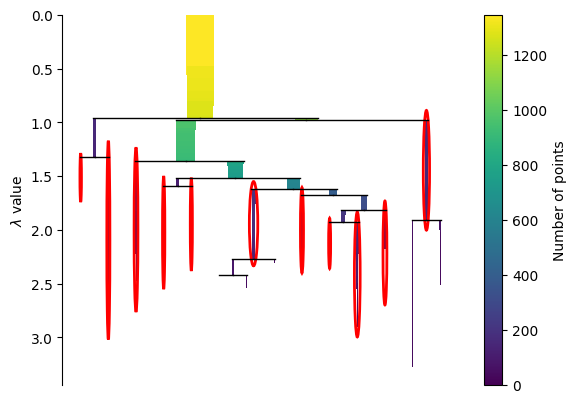

In [56]:
hdbscan_model.condensed_tree_.plot(select_clusters=True)

In [57]:
import plotly.express as px

In [58]:
assert len(topics) == len(df3)

In [59]:
df3['Topic'] = topics

In [60]:
df3.head()

,subReddit,Date,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion,Contains_Keywords,Topic
0,diabetes_t2,2023-12-05 00:00:00,2023-12-05 23:25:00,cheapest way to get a cgm without insurance?,well after being told my insurance would cover...,,,,,,cheapest way get cgm without insurance well af...,True,1
1,diabetes_t2,2023-12-20 00:00:00,2023-12-20 05:13:00,libre 3 doesn’t stick,i’ve used the libre 3 for 3 months off and on....,,,,,,libre doesn stick used the libre for months of...,False,-1
2,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,frustrated with libre 3,i just got off the phone with customer support...,,,,,,frustrated with libre just got off the phone w...,False,-1
3,diabetes_t2,2023-12-23 00:00:00,2023-12-23 23:16:00,frustrated with libre 3,i just got off the phone with customer support...,,,,,,finger prick was like beyond frustrated the ou...,False,0
4,diabetes_t2,2023-12-23 00:00:00,2023-12-23 02:32:00,libre 3 graphs 3 weeks in,the first graph was my first full day with my ...,,,,,,libre graphs weeks the first graph was first f...,False,2


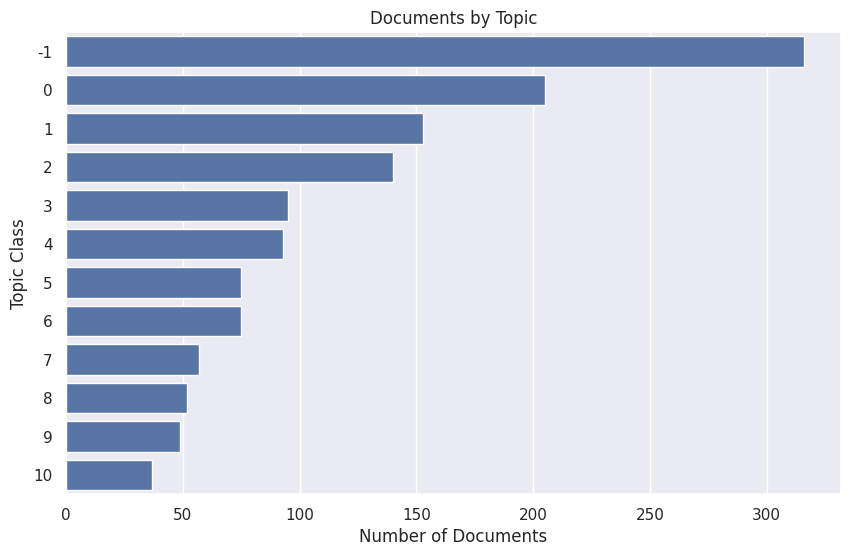

In [61]:
topic_counts = df3['Topic'].value_counts()
#data.drop(['Contains_Keywords'], axis=1)
# Create a count plot
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(y='Topic', data=df3, order = topic_counts.index)

# Labeling the plot
plt.title('Documents by Topic')
plt.xlabel('Number of Documents')
plt.ylabel('Topic Class')

# Show the plot
plt.show()

In [62]:
topic_distr, _ = BERTopic_model.approximate_distribution(texts)

100%|██████████| 2/2 [00:00<00:00,  4.34it/s]


In [63]:
BERTopic_model.visualize_distribution(topic_distr[1])

In [64]:
probs

array([[1.23371941e-308, 1.00000000e+000, 8.93413267e-309, ...,
        8.94060272e-309, 7.61572286e-309, 7.08448220e-309],
       [1.98771214e-001, 2.87244072e-002, 3.51398034e-002, ...,
        9.25024597e-002, 2.62357405e-002, 3.25436790e-002],
       [1.67857002e-001, 2.56747874e-002, 3.01852369e-002, ...,
        8.82590379e-002, 2.25576327e-002, 2.98568475e-002],
       ...,
       [3.74447987e-002, 3.43496126e-002, 2.32993333e-002, ...,
        6.84603898e-002, 1.85523966e-002, 3.43648715e-001],
       [5.50449371e-002, 5.98699536e-002, 3.15289813e-002, ...,
        9.88964721e-002, 2.60767317e-002, 1.66451849e-001],
       [1.12294115e-308, 1.10714100e-308, 7.71420450e-309, ...,
        1.90607440e-308, 5.66615163e-309, 3.43974356e-308]])

In [65]:
topic_distr, topic_token_distr = BERTopic_model.approximate_distribution(texts, calculate_tokens=True)
topic_dist_df = BERTopic_model.visualize_approximate_distribution(texts[1], topic_token_distr[1])


100%|██████████| 2/2 [00:01<00:00,  1.66it/s]


In [66]:
topic_dist_df

,libre,doesn,stick,used,the,libre,for,months,off,and,wish,had,more,consistently,but,never,had,unit,stay,more,than,days,been,frustrating,they,never,come,off,because,any,force,accident,they,just,become,loose,pregnant,now,and,would,like,able,wear,cgm,for,the,duration,pregnancy,what,gives,please,send,any,advice
0_low_libre_morning_normal,0.000,0.000,0.000,0.000,0.219,0.439,0.439,0.439,0.219,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1_dexcom_libre_need_tandem,0.000,0.000,0.000,0.000,0.124,0.248,0.248,0.248,0.124,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2_libre_iphone_scan_ios,0.000,0.000,0.000,0.000,0.259,0.519,0.519,0.519,0.259,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3_signal_alarm_alarms_android,0.000,0.000,0.000,0.000,0.109,0.218,0.218,0.218,0.109,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4_dexcom_low_libre_calibration,0.000,0.000,0.000,0.000,0.112,0.224,0.224,0.224,0.112,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5_libre_country_pixel_android,0.120,0.120,0.259,0.398,0.664,1.050,0.912,0.773,0.386,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8_transmitter_expired_libre_signal,0.000,0.000,0.000,0.000,0.109,0.218,0.218,0.218,0.109,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9_watch_data_libre_librelinkup,0.000,0.000,0.000,0.000,0.167,0.335,0.335,0.335,0.167,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


# **BERTopic Model Output Evaluation**

# **Coherence**
Measures the degree of semantic similarity between high scoring words in the topic. These measures help distinguish between topics that are semantically interpretable and topics that are artifacts of statistical inference.

C_V Measure: A coherence measure that uses a sliding window, a one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity.

In [67]:
coherence = BERTopic_model.get_topic_info(); coherence.head(10)

,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,316,-1_libre_arm_low_bad,"[libre, arm, low, bad, dexcom, issues, alarm, ...","[alarms, alarm, alerts, ios, alert, device, de...","[libre, arm, low, dexcom, issues, alarm, updat...",[medtronic should embarrassed dexcom tldr the ...
1,0,205,0_low_libre_morning_normal,"[low, libre, morning, normal, different, test,...","[diabetes, diabetic, sugars, diagnosed, meter,...","[low, libre, morning, normal, different, test,...",[consistently very inaccurate cgm readings hig...
2,1,153,1_dexcom_libre_need_tandem,"[dexcom, libre, need, tandem, without, people,...","[dexcom, libre dexcom, diabetes, appointment, ...","[dexcom, libre, need, tandem, without, take, a...",[yup saw comment recently similar post that sa...
3,2,140,2_libre_iphone_scan_ios,"[libre, iphone, scan, ios, data, working, upda...","[libre iphone, apps, libreview, android, ios, ...","[libre, scan, ios, data, error, librelink, blu...",[experience with the libre far put first senso...
4,3,95,3_signal_alarm_alarms_android,"[signal, alarm, alarms, android, libre, settin...","[alarms, signal alarm, alarm, alerts, apps, al...","[signal, alarm, alarms, android, libre, settin...",[just have say the alarm mgdl ridiculous the p...
5,4,93,4_dexcom_low_libre_calibration,"[dexcom, low, libre, calibration, calibrate, g...","[dexcom libre, dexcom, dexcoms, used dexcom, c...","[dexcom, low, libre, calibration, calibrate, i...",[new dexcom sensor issues just started using d...
6,5,75,5_libre_country_pixel_android,"[libre, country, pixel, android, juggluco, upd...","[libre android, devices libre, libre libre, li...","[libre, country, pixel, android, juggluco, upd...",[its because libre designed used with only one...
7,6,75,6_skin_arm_adhesive_tac,"[skin, arm, adhesive, tac, skin tac, placement...","[skin tac, skin grip, skin, tac, arm, tips, gr...","[skin, arm, adhesive, skin tac, placement, tap...",[advice sensor positioning everyone hope day g...
8,7,57,7_replacement_call_faulty_replace,"[replacement, call, faulty, replace, send, ope...","[defective, faulty, replacements, patches, sen...","[call, faulty, replace, send, open, bad, issue...",[call abbott get replacement thats your option...
9,8,52,8_transmitter_expired_libre_signal,"[transmitter, expired, libre, signal, expires,...","[expired transmitter, transmitter dead, signal...","[transmitter, expired, libre, signal, expires,...",[libre sensor issue observation ive been havin...


In [68]:
coherence_df = coherence

In [69]:
coherence_df

,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,316,-1_libre_arm_low_bad,"[libre, arm, low, bad, dexcom, issues, alarm, ...","[alarms, alarm, alerts, ios, alert, device, de...","[libre, arm, low, dexcom, issues, alarm, updat...",[medtronic should embarrassed dexcom tldr the ...
1,0,205,0_low_libre_morning_normal,"[low, libre, morning, normal, different, test,...","[diabetes, diabetic, sugars, diagnosed, meter,...","[low, libre, morning, normal, different, test,...",[consistently very inaccurate cgm readings hig...
2,1,153,1_dexcom_libre_need_tandem,"[dexcom, libre, need, tandem, without, people,...","[dexcom, libre dexcom, diabetes, appointment, ...","[dexcom, libre, need, tandem, without, take, a...",[yup saw comment recently similar post that sa...
3,2,140,2_libre_iphone_scan_ios,"[libre, iphone, scan, ios, data, working, upda...","[libre iphone, apps, libreview, android, ios, ...","[libre, scan, ios, data, error, librelink, blu...",[experience with the libre far put first senso...
4,3,95,3_signal_alarm_alarms_android,"[signal, alarm, alarms, android, libre, settin...","[alarms, signal alarm, alarm, alerts, apps, al...","[signal, alarm, alarms, android, libre, settin...",[just have say the alarm mgdl ridiculous the p...
5,4,93,4_dexcom_low_libre_calibration,"[dexcom, low, libre, calibration, calibrate, g...","[dexcom libre, dexcom, dexcoms, used dexcom, c...","[dexcom, low, libre, calibration, calibrate, i...",[new dexcom sensor issues just started using d...
6,5,75,5_libre_country_pixel_android,"[libre, country, pixel, android, juggluco, upd...","[libre android, devices libre, libre libre, li...","[libre, country, pixel, android, juggluco, upd...",[its because libre designed used with only one...
7,6,75,6_skin_arm_adhesive_tac,"[skin, arm, adhesive, tac, skin tac, placement...","[skin tac, skin grip, skin, tac, arm, tips, gr...","[skin, arm, adhesive, skin tac, placement, tap...",[advice sensor positioning everyone hope day g...
8,7,57,7_replacement_call_faulty_replace,"[replacement, call, faulty, replace, send, ope...","[defective, faulty, replacements, patches, sen...","[call, faulty, replace, send, open, bad, issue...",[call abbott get replacement thats your option...
9,8,52,8_transmitter_expired_libre_signal,"[transmitter, expired, libre, signal, expires,...","[expired transmitter, transmitter dead, signal...","[transmitter, expired, libre, signal, expires,...",[libre sensor issue observation ive been havin...


In [70]:
df3.to_excel('/content/drive/MyDrive/Colab Notebooks/BERTopic Model Outputs.xlsx')

In [71]:
coherence_df.to_excel('/content/drive/MyDrive/Colab Notebooks/BERTopic Coherence.xlsx')

# **Generating Labels from Topic Representations using 🤗Transformers**

In [ ]:
from bertopic.representation import TextGeneration
from transformers import pipeline

In [ ]:
representations = coherence['MMR'].tolist()
generator = pipeline('text2text-generation', model='google/flan-t5-base')

In [ ]:
representations

In [ ]:
representations_df = pd.DataFrame(representations)
print(representations_df)

In [ ]:
representations_df.to_excel('/content/drive/MyDrive/Colab Notebooks/BERTopic Representations.xlsx')

In [ ]:
import json
representations

In [ ]:
def generate_labels(keywords):
    labels = []
    for keyword in keywords:
        # Replace the placeholder with the actual keyword
        prompt = f"I have a topic represented by the following list of keyword: {keyword}. Considering heavily the context of Diabetic users of Continuous Glucose Monitoring sensors, where these keywords are from Reddit posts about Continuous Glucose Monitoring sensors, which Diabetics use to help them manage their condition; Summarise the specific nuance described by the representation."
        result = generator(prompt, max_length=50)
        labels.append(result[0]['generated_text'])
    return labels


In [ ]:
topic_labels = generate_labels(keywords_list)

In [ ]:
topic_labels

In [ ]:
#prompt = "I have a topic represented by the following keywords: [KEYWORDS]. Considering heavily the context of Diabetic users of Continuous Glucose Monitoring sensors, what is this topic about?"

# Create your representation model
#generator = pipeline('text2text-generation', model='google/flan-t5-base')
#representation_model = TextGeneration(generator, random_state = 42)

# **Topic Overlap**
 Refers to the extent to which topics share the same words. Overlapping topics might suggest that the model is not differentiating topics from each other well.

There is no direct function in BERTopic for measuring overlap, but you can infer it by examining the most important words per topic and see if there are common words across different topics.